## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Creating a dictionary of file names and df names to faciliate importing

# datasets_dict = {'bom.movie_gross':'bom_movie_gross','imdb.name.basics':'imdb_name_basics',
#                  'imdb.title.akas':'imdb_title_akas','imdb.title.basics':'imdb_title_basics',
#                  'imdb.title.crew':'imdb_title_crew','imdb.title.principals':'imdb_title_principals',
#                  'imdb.title.ratings':'imdb_title_ratings','tmdb.movies':'tmdb_movies',
#                  'tn.movie_budgets':'tn_movie_budgets'}

# def import_datasets(key, value):
#     value = pd.read_csv(f'./zippedData/{key}.csv.gz', compression='gzip', 
#                                  header=0, sep=',', quotechar='"')
#     return value
 
# for key, value in datasets_dict.items():
#     import_datasets(key, value)    

9 `CSV` datasets

In [3]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

2 `TSV` datasets

In [4]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

## EDA on `bom_movie_gross`

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Info 
#### Missing Values
* ~ 1300 missing in Foreign Gross and convert to float
* ~ 30 in domestic gross (already float)
* Studio is missing 5 values, may not be important

In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Set _index_ to movie title

In [7]:
bom_movie_gross.set_index(['title'], inplace=True)

__Domestic Gross__ 
_Top 5_

Divide column by 1 million to makes totals easier to evaluate

In [8]:
bom_movie_gross['domestic_gross_mm'] = bom_movie_gross['domestic_gross'] / 1000000

In [9]:
bom_movie_gross.sort_values(by='domestic_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Black Panther,BV,700100000.0,646900000,2018,700.1
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4


If over 1 billion, total is annotated as such `"1,131.6"` see foreign gross for Star Wars from [Box Office Mojo](https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_se_r_8).

__Foreign Gross__

_Cannot sort because dtype is object_

Additionally, scale needs to be adjusted, to the same way `domestic_gross` is annotated, so that data can be analyzed on the same scale. 

In [10]:
bom_movie_gross.sort_values(by='foreign_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Life's a Breeze,Magn.,3500.0,99700,2014,0.0035
The East,FoxS,2300000.0,99700,2013,2.3000
White Lion,Scre.,NaN,99600,2010,NaN
A United Kingdom,FoxS,3900000.0,9900000,2017,3.9000
Le Havre,Jan.,612000.0,9900000,2011,0.6120


_These are the 5 films that had foreign gross > 1 billion_

In [11]:
# filter foreign gross over 1 billion
bill_filt = bom_movie_gross['foreign_gross'].str.contains(',', na=False)
bom_movie_gross[bill_filt]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8


#### Create Function
* Checks if value is a string 
* If True, check for comma. 
* If True remove comma and convert to float. 
* If False, return float and divide by 1 million 
* Otherwise the value is numeric.

Once column is converted to floats all in the same decimal level, then they can be divided by 1 million to get correct scalling of foreign_gross. 

This function could be called clean_convert_gross.

In [13]:
def clean_convert_gross(x):
    """Check if value is a string, if True, check for comma.
    If True remove comma and convert to float. If False, return float 
    and divide by 1 million otherwise the value is numeric."""
    if isinstance(x, str):
        if ',' in x:
            billion = x.replace(',','')
            return float(billion)
        if ',' not in x:
            return (float(x))/1000000
    return(x)

In [14]:
bom_movie_gross['foreign_gross_mm'] = bom_movie_gross['foreign_gross'].apply(clean_convert_gross)

In [15]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3
Inception,WB,292600000.0,535700000,2010,292.6,535.7
Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9


Sort by new column `foreign_gross_mm` to get top 5 foreign gross.

In [16]:
bom_movie_gross.sort_values(by='foreign_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0


Create a `total_gross` column

In [17]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross_mm'] + bom_movie_gross['foreign_gross_mm'].fillna(0)

In [18]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 7 columns):
studio               3382 non-null object
domestic_gross       3359 non-null float64
foreign_gross        2037 non-null object
year                 3387 non-null int64
domestic_gross_mm    3359 non-null float64
foreign_gross_mm     2037 non-null float64
total_gross          3359 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 211.7+ KB


In [19]:
bom_movie_gross.sort_values(by='total_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4,895.5,1518.9
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0


### Categorizing the genre variable in the IMDB dataset.  The original genres classification contained 1085 
### unique classifications.  These are combinations of certain basic classifications.  Here creating non-mutually 
### exclusive genre classifications.

In [21]:
imdb_title_basics['genres'].nunique()

1085

In [22]:
imdb_title_basics['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [23]:
#creating a list of all genres
list_of_genres = list(imdb_title_basics['genres'])

#python is interpreting nan as a float which prevents us iterating over this entries with string methods
# imdb_title_basics['genres'].isna().sum()
#Using the isinstance to get around this problem
list_of_genres2 = []

for a in range(0, len(list_of_genres)):
    if isinstance(list_of_genres[a], str):
        list_of_genres2.append(list_of_genres[a])

#Multiple entries are seperated by commas. Using split function to make each genre an individual entry.
list_of_genres3 = []
for a in range(0, len(list_of_genres2)):
    list_of_genres3.extend(list_of_genres2[a].split(','))

#Using set function to get the list of unique genres    
unique_genres = set(list_of_genres3)

unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [24]:
#Using the unique_genres list to create the non-mutually exclusive variables

for genre in unique_genres:
    imdb_title_basics[f'{genre}_movie'] = imdb_title_basics['genres'].str.contains(f'{genre}')

In [25]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Mystery_movie,Adventure_movie,Sport_movie,Short_movie,...,Fantasy_movie,Romance_movie,War_movie,Documentary_movie,History_movie,Musical_movie,Game-Show_movie,Comedy_movie,Family_movie,Crime_movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


Merge IMDB_title_basics with BOM_movie_gross

In [26]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 33 columns):
tconst               146144 non-null object
primary_title        146144 non-null object
original_title       146123 non-null object
start_year           146144 non-null int64
runtime_minutes      114405 non-null float64
genres               140736 non-null object
Mystery_movie        140736 non-null object
Adventure_movie      140736 non-null object
Sport_movie          140736 non-null object
Short_movie          140736 non-null object
Drama_movie          140736 non-null object
Talk-Show_movie      140736 non-null object
Horror_movie         140736 non-null object
Music_movie          140736 non-null object
Thriller_movie       140736 non-null object
Animation_movie      140736 non-null object
Sci-Fi_movie         140736 non-null object
Adult_movie          140736 non-null object
Reality-TV_movie     140736 non-null object
Biography_movie      140736 non-null object
Western_m

In [27]:
bom_movie_gross.reset_index(inplace=True)

In [28]:
imdb_title_basics.sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Mystery_movie,Adventure_movie,Sport_movie,Short_movie,...,Fantasy_movie,Romance_movie,War_movie,Documentary_movie,History_movie,Musical_movie,Game-Show_movie,Comedy_movie,Family_movie,Crime_movie
13871,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
131857,tt8219776,#5,#5,2018,NaN,Documentary,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61849,tt3566826,è solo questione di punti di vista,è solo questione di punti di vista,2012,103.0,"Action,Adventure,Comedy",False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
61401,tt3547074,è solo questione di tempo,è solo questione di tempo,2013,72.0,Comedy,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
139058,tt8976950,élèctions piege à cons,élèctions piege à cons,2014,NaN,Comedy,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
102502,tt5997078,împetu,împetu,2017,NaN,Documentary,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


titles in the imdb dataset were duplicated; merging on title and year to correctly merge with corresponding gross in the BOM movie dataset

In [29]:
bom_gross_title_basics = pd.merge(bom_movie_gross, imdb_title_basics, how='left', 
                                  left_on=['title','year'], right_on=['primary_title','start_year'])

In [30]:
bom_gross_title_basics.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Fantasy_movie,Romance_movie,War_movie,Documentary_movie,History_movie,Musical_movie,Game-Show_movie,Comedy_movie,Family_movie,Crime_movie
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,True,False,False
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,False,False,False,False,False,False
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,True,False,False


In [31]:
bom_gross_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 0 to 3426
Data columns (total 41 columns):
title                3427 non-null object
studio               3422 non-null object
domestic_gross       3399 non-null float64
foreign_gross        2061 non-null object
year                 3427 non-null int64
domestic_gross_mm    3399 non-null float64
foreign_gross_mm     2061 non-null float64
total_gross          3399 non-null float64
tconst               1873 non-null object
primary_title        1873 non-null object
original_title       1873 non-null object
start_year           1873 non-null float64
runtime_minutes      1863 non-null float64
genres               1871 non-null object
Mystery_movie        1871 non-null object
Adventure_movie      1871 non-null object
Sport_movie          1871 non-null object
Short_movie          1871 non-null object
Drama_movie          1871 non-null object
Talk-Show_movie      1871 non-null object
Horror_movie         1871 non-null object
Music_

In [32]:
bom_gross_title_basics_ratings = pd.merge(bom_gross_title_basics, imdb_title_ratings, how='left', 
                                  left_on='tconst', right_on='tconst')

In [33]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,War_movie,Documentary_movie,History_movie,Musical_movie,Game-Show_movie,Comedy_movie,Family_movie,Crime_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,True,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,False,False,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,True,False,False,6.3,167532.0


## EDA on `imdb_title_ratings`

In [34]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Check for null values

In [35]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Get descriptive statistics

In [36]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Get top 5 `averagerating` > mean of 3524 `numvotes`

In [37]:
# create a filter for above mean of numvotes
num_vote_filt  = imdb_title_ratings['numvotes'] > imdb_title_ratings['numvotes'].mean()

In [38]:
imdb_title_ratings[num_vote_filt].sort_values(by='averagerating', ascending=False)[:5]

,tconst,averagerating,numvotes
63149,tt7131622,9.7,5600
12174,tt5963218,9.5,6509
4461,tt7738784,9.4,9629
49629,tt2170667,9.3,17308
10198,tt5354160,9.3,18470


Get top 5 `numvotes` > mean of 6.3 `averagerating`

In [39]:
# create a filter for above mean of averagerating
average_rating_filt = imdb_title_ratings['averagerating'] > imdb_title_ratings['averagerating'].mean()

In [40]:
imdb_title_ratings[average_rating_filt].sort_values(by='numvotes', ascending=False)[:5]

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655


What is the relationship between `averagerating` and `numvotes`?

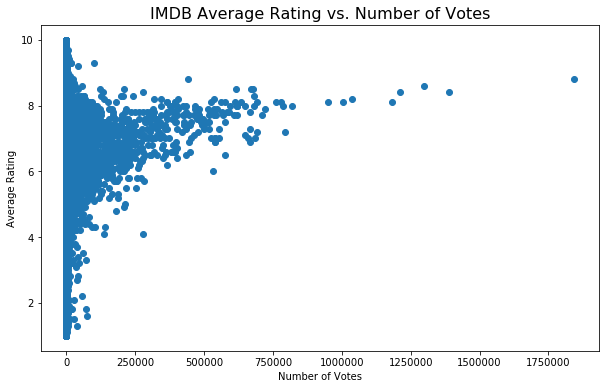

In [41]:
ratings_fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(imdb_title_ratings['numvotes'], imdb_title_ratings['averagerating'])
ax.set_title('IMDB Average Rating vs. Number of Votes', fontsize=16)
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Average Rating')
plt.show()


## Movie gross and title ratings

In [42]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,War_movie,Documentary_movie,History_movie,Musical_movie,Game-Show_movie,Comedy_movie,Family_movie,Crime_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,True,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,False,False,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,True,False,False,6.3,167532.0


Create Scatterplot to show relationship between Total Gross vs. Average Rating

Create `bool` column for > or < mean of `averagerating`.

In [45]:
bom_gross_title_basics_ratings['avg_averagerating'] = bom_gross_title_basics_ratings['averagerating'] > bom_gross_title_basics_ratings['averagerating'].mean()

Create new df by selecting columns needed for this visulization

In [46]:
bom_gross_ratings_df = bom_gross_title_basics_ratings[['title', 'domestic_gross_mm', 'foreign_gross_mm','total_gross','averagerating', 'avg_averagerating']]

In [47]:
bom_gross_ratings_df.set_index('title', inplace=True)

In [48]:
bom_gross_ratings_df.head()

,domestic_gross_mm,foreign_gross_mm,total_gross,averagerating,avg_averagerating
title,,,,,
Toy Story 3,415.0,652.0,1067.0,8.3,True
Alice in Wonderland (2010),334.2,691.3,1025.5,NaN,False
Harry Potter and the Deathly Hallows Part 1,296.0,664.3,960.3,NaN,False
Inception,292.6,535.7,828.3,8.8,True
Shrek Forever After,238.7,513.9,752.6,6.3,False


Set `bool` values to Yes/No

In [58]:
bom_gross_ratings_df = bom_gross_ratings_df.replace({'avg_averagerating': {True: 'Yes',
                                                                          False: 'No'}})

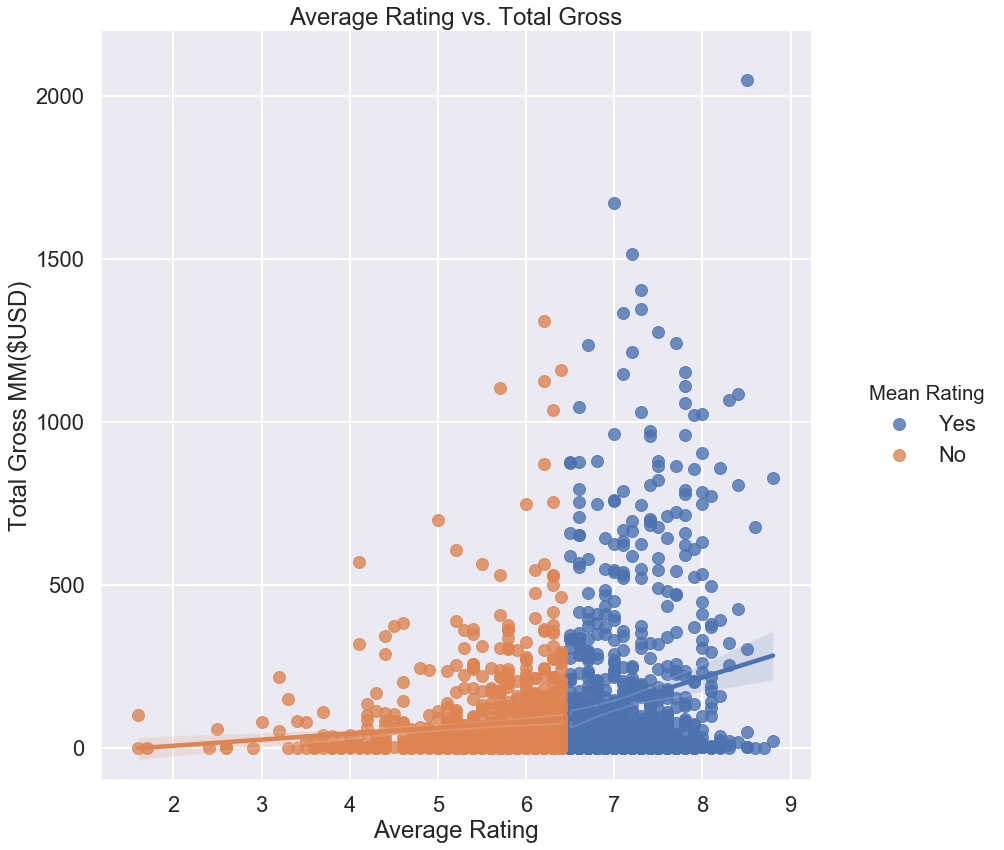

In [51]:
sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")
ax = sns.lmplot(data=bom_gross_ratings_df, x='averagerating', y='total_gross', hue='avg_averagerating', 
                height=12, hue_order=['Yes', 'No']);
ax.set_xlabels('Average Rating')
ax.set_ylabels('Total Gross MM($USD)')
ax.set(ylim=(-100,2200))
ax._legend.set_title('Mean Rating')
plt.title('Average Rating vs. Total Gross')
plt.savefig('avg_rating vs total gross.png')

Remove Top 5/Bottom 5 and regraph

In [60]:
bom_gross_ratings_df.sort_values(by='total_gross', ascending=False, inplace=True)

In [66]:
bom_gross_ratings_df_top5 = bom_gross_ratings_df.iloc[5:-5]

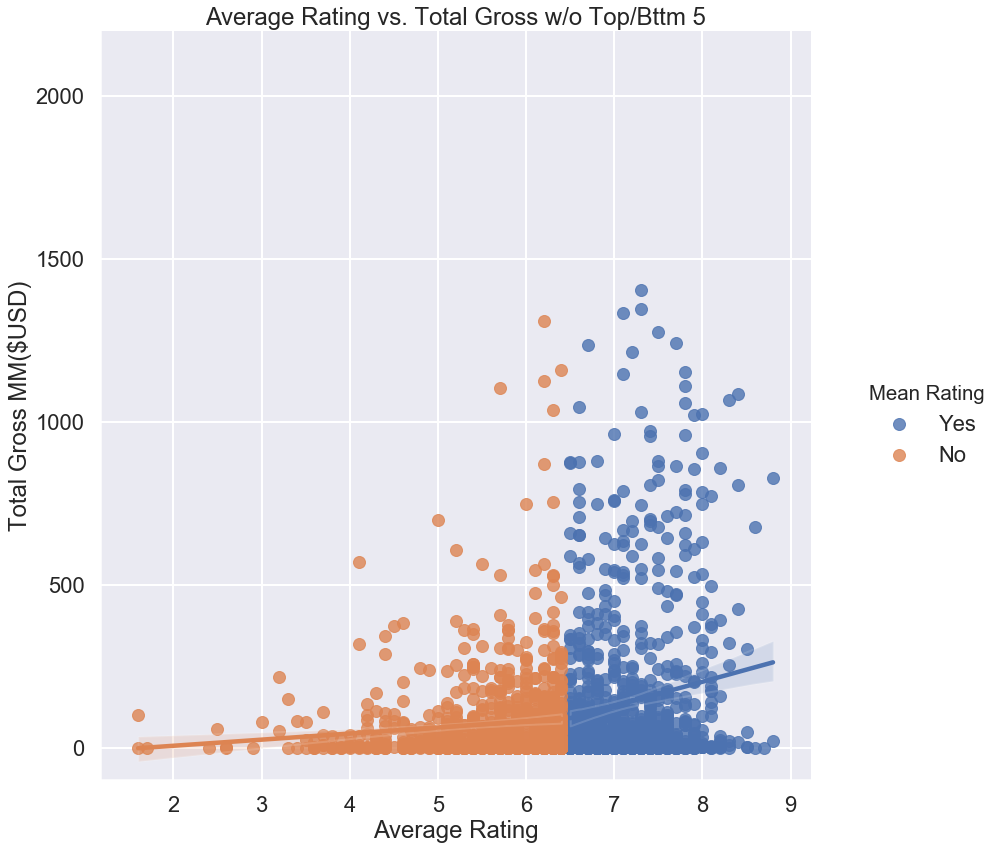

In [52]:
sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")
ax = sns.lmplot(data=bom_gross_ratings_df_top5, x='averagerating', y='total_gross', hue='avg_averagerating', 
                height=12, hue_order=['Yes', 'No']);
ax.set_xlabels('Average Rating')
ax.set_ylabels('Total Gross MM($USD)')
ax.set(ylim=(-100,2200))
ax._legend.set_title('Mean Rating')
plt.title('Average Rating vs. Total Gross w/o Top/Bttm 5')
plt.savefig('avg_rating vs total_gross no outliers.png');